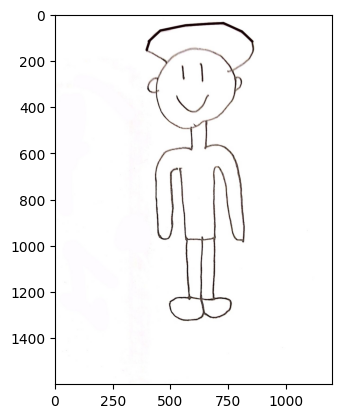

In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
from scipy.interpolate import splprep, splev
from skimage import measure

man = cv2.imread("drawings/man-front.jpg")
plt.imshow(cv2.cvtColor(man, cv2.COLOR_BGR2RGB))

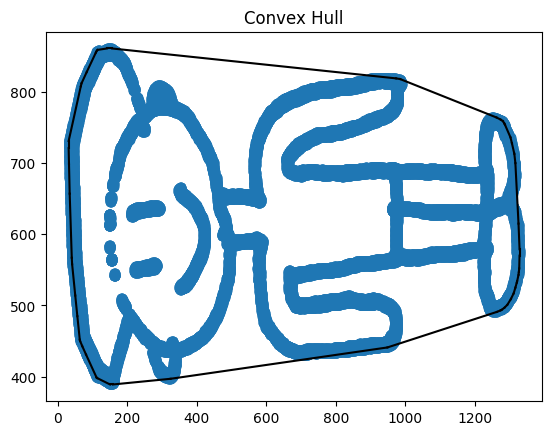

In [2]:
# Convert the image to grayscale
gray_man = cv2.cvtColor(man, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, binary_man = cv2.threshold(gray_man, 127, 255, cv2.THRESH_BINARY)

# Apply Sobel operator to find edges
sobelx = cv2.Sobel(binary_man, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(binary_man, cv2.CV_64F, 0, 1, ksize=5)
sobel_edges = np.sqrt(sobelx**2 + sobely**2)

points = np.column_stack(np.where(sobel_edges > 0))


hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
plt.title('Points in the image')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
plt.title('Convex Hull')
plt.show()

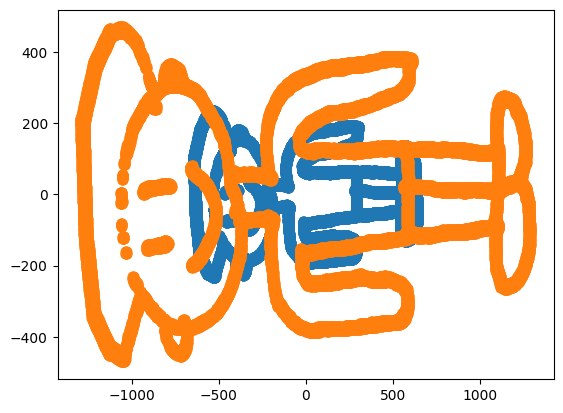

In [6]:
x = hull.max_bound[0] - hull.min_bound[0]
y = hull.max_bound[1] - hull.min_bound[1]
center = (x//2 + hull.min_bound[0], y//2 + hull.min_bound[1])
scale_factor = 2.0
trans_points = (points - center) * scale_factor
original_points = points - center
plt.plot(original_points[:,0], original_points[:,1], 'o')
plt.plot(trans_points[:,0], trans_points[:,1], 'o')
plt.show()